# 1. 모듈 임포트

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
from PIL import Image
%matplotlib inline

# 2. 이미지 불러오기

In [2]:
dir_path = '../../data/celebrity/'

file_list = os.listdir(dir_path)
print(len(file_list))

282


# 3. 얼굴 영역 크롭

In [3]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)

    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

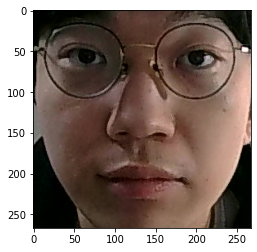

In [4]:
image_file = os.path.join(dir_path, '박장호1.jpg') # 경로 설정
face = get_cropped_face(image_file) # 함수 실행

plt.imshow(face) # face를 plt 없이 출력하면 배열 나옴

# 4. 얼굴 영역 임베딩 추출

In [5]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [6]:
image_file = os.path.join(dir_path, '윤아.jpg') # 경로 설정
face = get_cropped_face(image_file) # 얼굴 영역 자르기
embedding = get_face_embedding(face) # 영역 임베딩 구하기
embedding

[array([-0.04312247,  0.08564552,  0.03009056, -0.08181583, -0.11011461,
         0.02494148, -0.10772792, -0.05701545,  0.17388532, -0.18900771,
         0.16986866, -0.03416952, -0.17708749, -0.05368887, -0.01866906,
         0.21673702, -0.20324194, -0.17635439, -0.02879484, -0.01345684,
         0.06087445,  0.06625142, -0.01931382,  0.05088738, -0.14900336,
        -0.36360452, -0.07931203, -0.00558482, -0.00789603, -0.08097173,
        -0.07099783,  0.06724349, -0.19027036,  0.01524133,  0.0240485 ,
         0.09224878,  0.01277889, -0.13150908,  0.16621512,  0.04842792,
        -0.27101019,  0.04768866,  0.03001825,  0.22964384,  0.1573851 ,
        -0.02196661,  0.0071197 , -0.13134143,  0.13647683, -0.15807396,
         0.03541355,  0.16926353, -0.00215843,  0.05462443,  0.00675566,
        -0.12905742,  0.01647738,  0.14232153, -0.10321216, -0.04842221,
         0.03842257, -0.02524096,  0.01162205, -0.11770099,  0.17995374,
         0.0968788 , -0.06566481, -0.26271284,  0.1

In [7]:
# 임베딩 벡터 딕셔너리 함수

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try:
            image_file = os.path.join(dir_path, file) # 경로 설정
            face = get_cropped_face(image_file) # 얼굴 영역 자르기
        except:
            os.remove(image_file) # 얼굴 영역 인식 X 삭제

        embedding = get_face_embedding(face) # 얼굴 영역을 임베딩 벡터로 전환
        if len(embedding) > 0: # 임베딩이 0인 경우 제외
            embedding_dict[os.path.splitext(file)[0]] = embedding[0] # 파일명에서 확장자가 제거된 상태로 이름 저장
    
    return embedding_dict

embedding_dict = get_face_embedding_dict(dir_path)

In [8]:
embedding_dict['개리']

array([-0.12731692,  0.11618062,  0.06072313, -0.07063425, -0.11645462,
       -0.0294838 , -0.12000352, -0.17071292,  0.15307875, -0.11180147,
        0.2058077 , -0.0443023 , -0.19827521, -0.08174729, -0.04518603,
        0.18390509, -0.15807188, -0.16781014, -0.02347131,  0.02060994,
        0.08324878,  0.02791013,  0.03367964,  0.00849335, -0.14328489,
       -0.30565485, -0.12465107, -0.09971917, -0.04458031, -0.05970416,
       -0.06729465,  0.04869324, -0.17862394, -0.04398493,  0.04471551,
        0.1252909 ,  0.01038533,  0.02042078,  0.15137216, -0.007281  ,
       -0.23824966,  0.08486456,  0.11544122,  0.23488449,  0.18308862,
        0.04028054,  0.00865274, -0.17066842,  0.10053978, -0.09201643,
        0.02200394,  0.15764567,  0.10212395,  0.07442096,  0.04325603,
       -0.10487253,  0.04488011,  0.09943517, -0.08380388,  0.05227353,
        0.1555398 , -0.07056648, -0.07934238, -0.07680524,  0.24708679,
        0.03258295, -0.138695  , -0.19184487,  0.07935563, -0.07

# 4. 사진과 연예인 사진 비교

In [9]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1] - embedding_dict[name2], ord=2)

In [10]:
# 내 사진 2개 비교
get_distance('박장호1', '박장호2')

0.26796257428467174

In [11]:
# 다른 사진 2개 비교
get_distance('개리', '공유')

0.596662663513173

In [12]:
# 닮은 연예인 찾는 함수

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [13]:
def get_nearest_face(name, dir_path, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    print('target : {}'.format(name))
    image = img.imread(os.path.join(dir_path, name + '.jpg'))
    plt.imshow(image)
    plt.show()
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            image = img.imread(os.path.join(dir_path, sorted_faces[i][0] + '.jpg'))
            plt.imshow(image)
            plt.show()

target : 박장호1


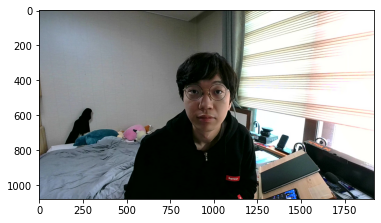

순위 1 : 이름(박장호2), 거리(0.26796257428467174)


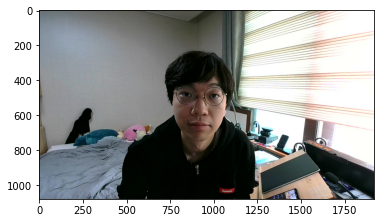

순위 2 : 이름(하현우), 거리(0.48024341265068315)


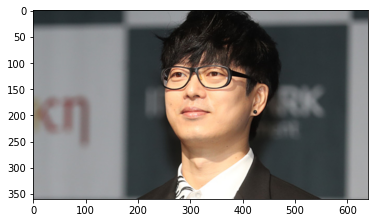

순위 3 : 이름(장원준), 거리(0.4809309668003889)


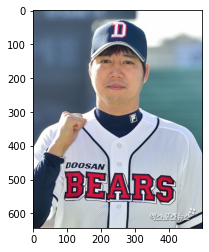

순위 4 : 이름(제이콥 배털론), 거리(0.48974307914128234)


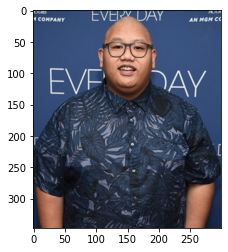

순위 5 : 이름(박재범), 거리(0.4956996859173806)


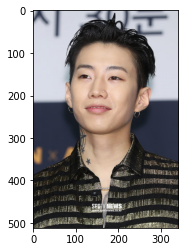

순위 6 : 이름(공효진), 거리(0.49655716396233723)


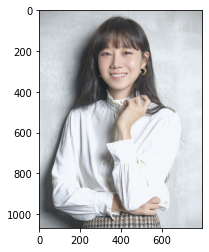

In [14]:
get_nearest_face('박장호1', dir_path)

- 그나마 가장 가까운게 하현우인데, 거리가 멀어보여도 내 같은 사진 2개랑도 거리가 0.26 인걸 생각해보면 꽤 비슷한 것 같다.
- 5위에 공효진이 있는건 의외;
- 응 교수님 영상에서 facenet 설명할 때, 좀 더 비슷한 사진이라던가 데이터를 더 많이 두었다면 거리도 확실히 비교 될만하게 나오지 않았을까 싶고...
- 이미지 임베딩, 워드 임베딩 관련해서 더 배워둬야겠다...